In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


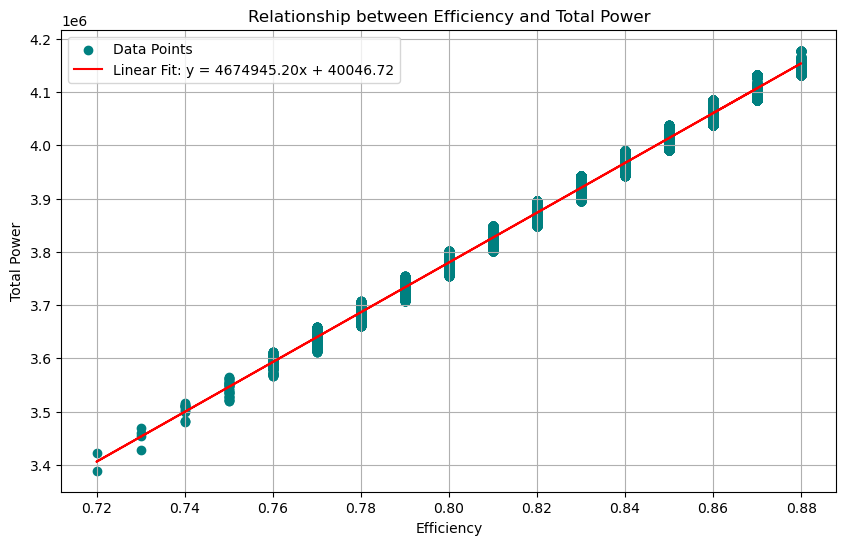

(40046.715990297496, 4674945.198334545, 0.9865972387758514, 0.9932760133899597)

In [15]:

data = pd.read_csv('/Users/kayadetunji/Downloads/somes/large-scale+wave+energy+farm/WEC_Perth_49.csv')

# Extract the last two columns
efficiency = data['qW']  # Efficiency
total_power = data['Total_Power']  # Total Power

# Linear regression
model = LinearRegression()
model.fit(efficiency.values.reshape(-1, 1), total_power)

# Coefficients and R^2 score
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(efficiency.values.reshape(-1, 1), total_power)

# Correlation coefficient
correlation_coefficient = np.corrcoef(efficiency, total_power)[0, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(efficiency, total_power, color='teal', label='Data Points')
plt.plot(efficiency, model.predict(efficiency.values.reshape(-1, 1)), color='red', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Efficiency')
plt.ylabel('Total Power')
plt.title('Relationship between Efficiency and Total Power')
plt.legend()
plt.grid(True)
plt.show()

(intercept, slope, r_squared, correlation_coefficient)


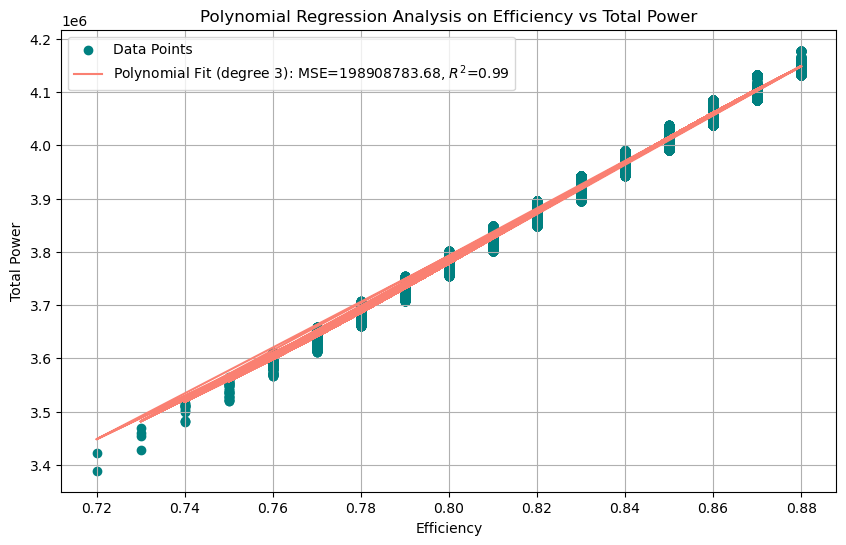

(198908783.6827126, 0.9867698862981016)

In [21]:

# Polynomial regression for comparison
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(efficiency.values.reshape(-1, 1))

model_poly = LinearRegression()
model_poly.fit(X_poly, total_power)
y_poly_pred = model_poly.predict(X_poly)
# coefficients and intercept
intercept_poly = model_poly.intercept_
coefficients_poly = model_poly.coef_

# Construct the polynomial equation
polynomial_equation = f"Total Power = {intercept_poly:.2f}"
for i in range(1, len(coefficients_poly)):
    polynomial_equation += f" + {coefficients_poly[i]:.2f}*(Efficiency^{i})"

# MSE and R^2 for polynomial regression
mse_poly = mean_squared_error(total_power, y_poly_pred)
r_squared_poly = model_poly.score(X_poly, total_power)

# Scatter plot with polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(efficiency, total_power, color='teal', label='Data Points')
plt.plot(efficiency, y_poly_pred, color='salmon', label=f'Polynomial Fit (degree 3): MSE={mse_poly:.2f}, $R^2$={r_squared_poly:.2f}')
plt.xlabel('Efficiency')
plt.ylabel('Total Power')
plt.title('Polynomial Regression Analysis on Efficiency vs Total Power')
plt.legend()
plt.grid(True)
plt.show()

(mse_poly, r_squared_poly)


In [23]:
polynomial_equation

'Total Power = 29204300.24 + -102288272.01*(Efficiency^1) + 130640117.62*(Efficiency^2) + -53134729.34*(Efficiency^3)'

/Users/kayadetunji/opt/anaconda3/envs/kay/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


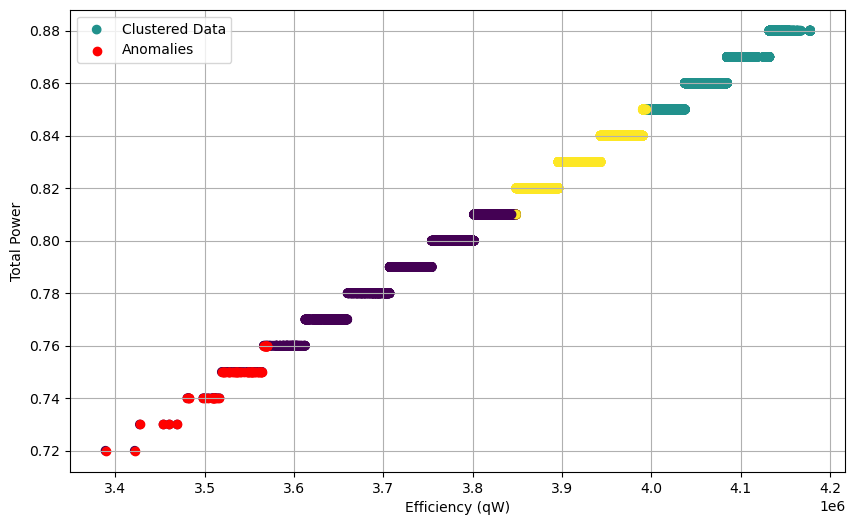

In [27]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Initial preparation for piecewise linear regression and anomaly detection
# Standardizing the data for anomaly detection
z_scores = zscore(data[['Total_Power', 'qW']])

# KMeans to identify groups - assuming 3 clusters for initial exploration
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data[['Total_Power', 'qW']])
data['Cluster'] = clusters

# Anomalies based on z-scores
anomalies = (np.abs(z_scores) > 3).any(axis=1)
anomaly_data = data[anomalies]

# Scatter plot with clusters and anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Power'], data['qW'], c=data['Cluster'], cmap='viridis', label='Clustered Data')
plt.scatter(anomaly_data['Total_Power'], anomaly_data['qW'], color='red', label='Anomalies')
plt.xlabel('Efficiency (qW)')
plt.ylabel('Total Power')
plt.legend()
plt.grid(True)
plt.show()

# Details of anomalies
# anomaly_data[['qW', 'Total_Power']]


In [25]:
# Attempt to create three groups to see if it resolves the unique bin edges issue
data['Efficiency_Group'] = pd.qcut(data['qW'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

# Group by efficiency and calculate mean and standard deviation of Total Power again
efficiency_stats = data.groupby('Efficiency_Group')['Total_Power'].agg(['mean', 'std']).reset_index()

efficiency_stats


,Efficiency_Group,mean,std
0,Low,3.813957e+06,64624.271411
1,Medium,3.954203e+06,38922.514758
2,High,4.083095e+06,26205.998635


In [24]:
# Check the distribution 
efficiency_distribution = {
    'Min': data['qW'].min(),
    'Median': data['qW'].median(),
    'Max': data['qW'].max()
}

efficiency_distribution


{'Min': 0.72, 'Median': 0.83, 'Max': 0.88}

In [ ]:
from sklearn.metrics import silhouette_score, mutual_info_score, davies_bouldin_score, calinski_harabasz_score

# Preparing the data and labels for metric calculations
X_clustered = np.column_stack((total_power, efficiency))

# Calculate metrics
silhouette_avg = silhouette_score(X_clustered, clusters)
mutual_info = mutual_info_score(data['Efficiency_Category'].cat.codes, clusters)  # Mutual information
davies_bouldin = davies_bouldin_score(X_clustered, clusters)
calinski_harabasz = calinski_harabasz_score(X_clustered, clusters)

{
    "Silhouette Score": silhouette_avg,
    "Mutual Information Score": mutual_info,
    "Davies-Bouldin Index": davies_bouldin,
    "Calinski-Harabasz Index": calinski_harabasz
}


In [28]:
import pandas as pd

# Example mock data setup for demonstration
mock_data = {
    'X1': [1, 2, 3],
    'Y1': [4, 5, 6],
    'P1': [100, 200, 300],
    'X2': [7, 8, 9],
    'Y2': [10, 11, 12],
    'P2': [400, 500, 600],
    'X3': [13, 14, 15],
    'Y3': [16, 17, 18],
    'P3': [700, 800, 900]
}
df = pd.DataFrame(mock_data)

# Transforming this data to a structured format where each row represents a unit with X, Y, Power
unit_data = []
for i in range(1, 4):  # Adjust the range based on your dataset
    x_col = f'X{i}'
    y_col = f'Y{i}'
    p_col = f'P{i}'
    temp_df = df[[x_col, y_col, p_col]].rename(columns={x_col: 'X', y_col: 'Y', p_col: 'Power'})
    temp_df['Unit'] = f'Unit{i}'
    unit_data.append(temp_df)

# Concatenating all unit data into a single DataFrame
structured_df = pd.concat(unit_data, ignore_index=True)
print(structured_df)


    X   Y  Power   Unit
0   1   4    100  Unit1
1   2   5    200  Unit1
2   3   6    300  Unit1
3   7  10    400  Unit2
4   8  11    500  Unit2
5   9  12    600  Unit2
6  13  16    700  Unit3
7  14  17    800  Unit3
8  15  18    900  Unit3


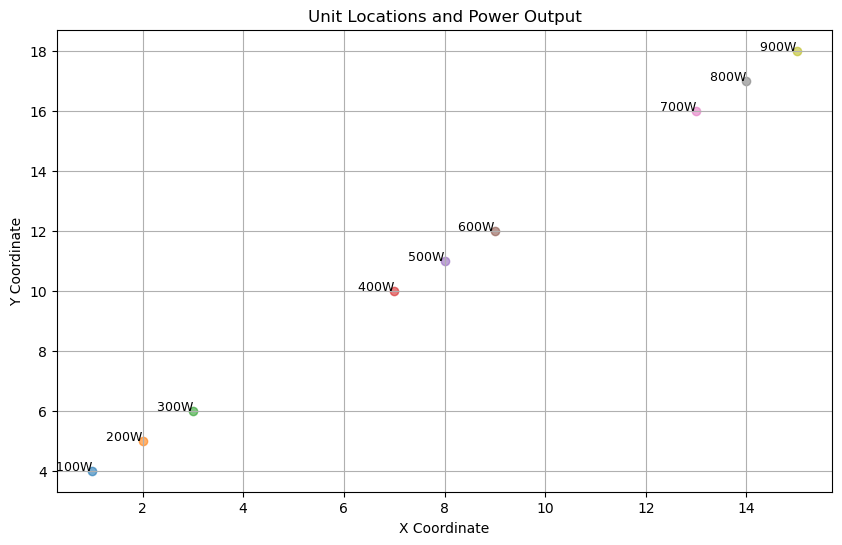

In [30]:
import matplotlib.pyplot as plt

# Assuming structured_df is correctly formatted and available from previous mock data setup
# Creating a scatter plot of the units' locations and annotating with their power

# Use structured_df directly since we can assume it's formatted as needed for this example
plt.figure(figsize=(10, 6))
for _, row in structured_df.iterrows():
    plt.scatter(data['Total_Power'], data['qW'], label=f'{row["Unit"]} Power: {row["Power"]}W', alpha=0.6)
    plt.text(row['X'], row['Y'], f' {row["Power"]}W', fontsize=9, ha='right')

plt.title('Unit Locations and Power Output')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
# plt.legend(title='Unit Power')
plt.grid(True)
plt.show()

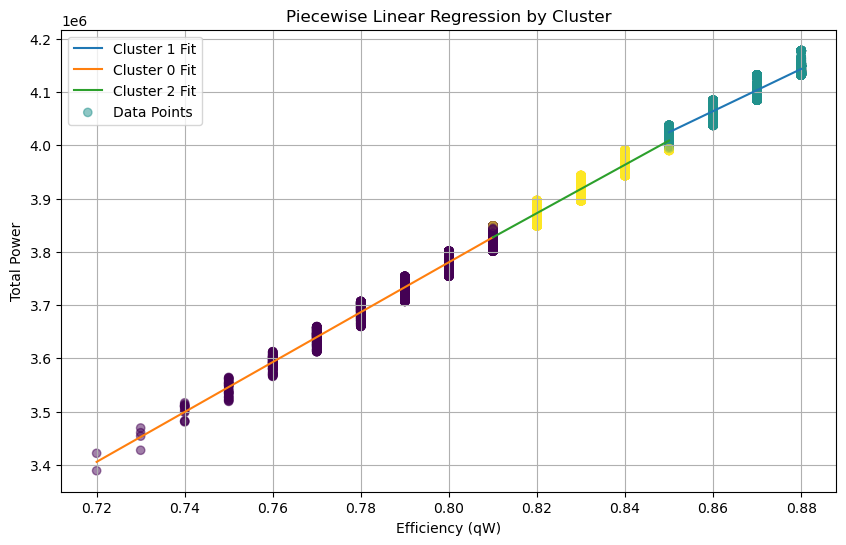

[(658291.3578648586, 3960355.0587752494, 0.82563993475835),
 (31447.178588188253, 4686292.441531056, 0.9469138569407722),
 (147582.74254265334, 4542868.522672258, 0.8952124626689965)]

In [13]:
# plot piecewise linear regression for each cluster
def fit_piecewise_linear(cluster_data):
    models = []
    cluster_ids = cluster_data['Cluster'].unique()
    
    plt.figure(figsize=(10, 6))
    
    for cluster_id in cluster_ids:
        cluster_subset = cluster_data[cluster_data['Cluster'] == cluster_id]
        x_cluster = cluster_subset['qW'].values.reshape(-1, 1)
        y_cluster = cluster_subset['Total_Power']
        
        model = LinearRegression()
        model.fit(x_cluster, y_cluster)
        models.append((model.intercept_, model.coef_[0], model.score(x_cluster, y_cluster)))
        
        # Plotting
        x_range = np.linspace(x_cluster.min(), x_cluster.max(), 100).reshape(-1, 1)
        plt.plot(x_range, model.predict(x_range), label=f'Cluster {cluster_id} Fit')
        
    plt.scatter(data['qW'], data['Total_Power'], c=data['Cluster'], cmap='viridis', alpha=0.5, label='Data Points')
    plt.xlabel('Efficiency (qW)')
    plt.ylabel('Total Power')
    plt.title('Piecewise Linear Regression by Cluster')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return models

# Fit piecewise linear regression models to each cluster
piecewise_models = fit_piecewise_linear(data)
piecewise_models
